# Loaded Advertising dataset
---
I am using Advertising_Data.csv as an input to the MMM model.

Datasource: https://www.kaggle.com/datasets/singhnavjot2062001/product-advertising-data

"*Explore the dynamics of advertising impact on product sales with this synthesized dataset. Created using Python programming language, the dataset comprises seven columns representing advertising costs on various platforms — TV, Billboards, Google Ads, Social Media, Influencer Marketing, and Affiliate Marketing. The last column, 'Product_Sold' quantifies the corresponding number of units sold. This dataset is designed for analysis and experimentation, allowing you to delve into the relationships between different advertising channels and the resulting product sales. Gain insights into marketing strategies and optimize your approach using this comprehensive, yet user-friendly dataset.*"

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Advertising_Data.csv to Advertising_Data.csv


In [ ]:
df = pd.read_csv("Advertising_Data.csv")
y = 'Product_Sold'
X = [x for x in df.columns if x != target]

# Data exploratory


---
- There is **no null value** in the dataset
- Correlation matrix shows that all marketing channels has positive effect on Product_Sold with the **Affiliate_Marketing being the highest correlated activities with Product_Sold**
- **On average, daily spend** for all marketing channel falls between **400-600 dollars**


In [ ]:
df.head()

,TV,Billboards,Google_Ads,Social_Media,Influencer_Marketing,Affiliate_Marketing,Product_Sold
0,281.42,538.80,123.94,349.30,242.77,910.10,7164.0
1,702.97,296.53,558.13,180.55,781.06,132.43,5055.0
2,313.14,295.94,642.96,505.71,438.91,464.23,6154.0
3,898.52,61.27,548.73,240.93,278.96,432.27,5480.0
4,766.52,550.72,651.91,666.33,396.33,841.93,9669.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TV                    300 non-null    float64
 1   Billboards            300 non-null    float64
 2   Google_Ads            300 non-null    float64
 3   Social_Media          300 non-null    float64
 4   Influencer_Marketing  300 non-null    float64
 5   Affiliate_Marketing   300 non-null    float64
 6   Product_Sold          300 non-null    float64
dtypes: float64(7)
memory usage: 16.5 KB


In [ ]:
# The data has no null value
# However, if there is null, I can either
    # 1. Fill null values with the mean of the column
         ## df_filled_mean = df.fillna(df.mean())
    # 2. Drop the null values
         ## df_dropped = df.dropna()

df.isnull().sum()

,0
TV,0
Billboards,0
Google_Ads,0
Social_Media,0
Influencer_Marketing,0
Affiliate_Marketing,0
Product_Sold,0


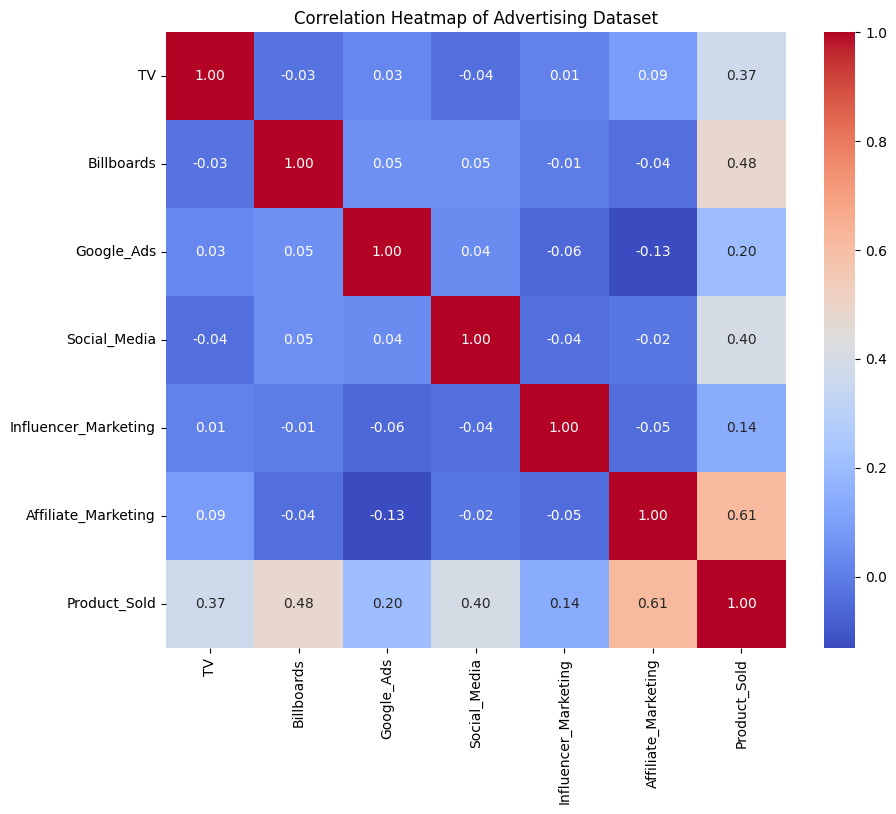

In [ ]:
correlation_matrix = df.corr()

# Plot correlation heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Advertising Dataset')
plt.show()

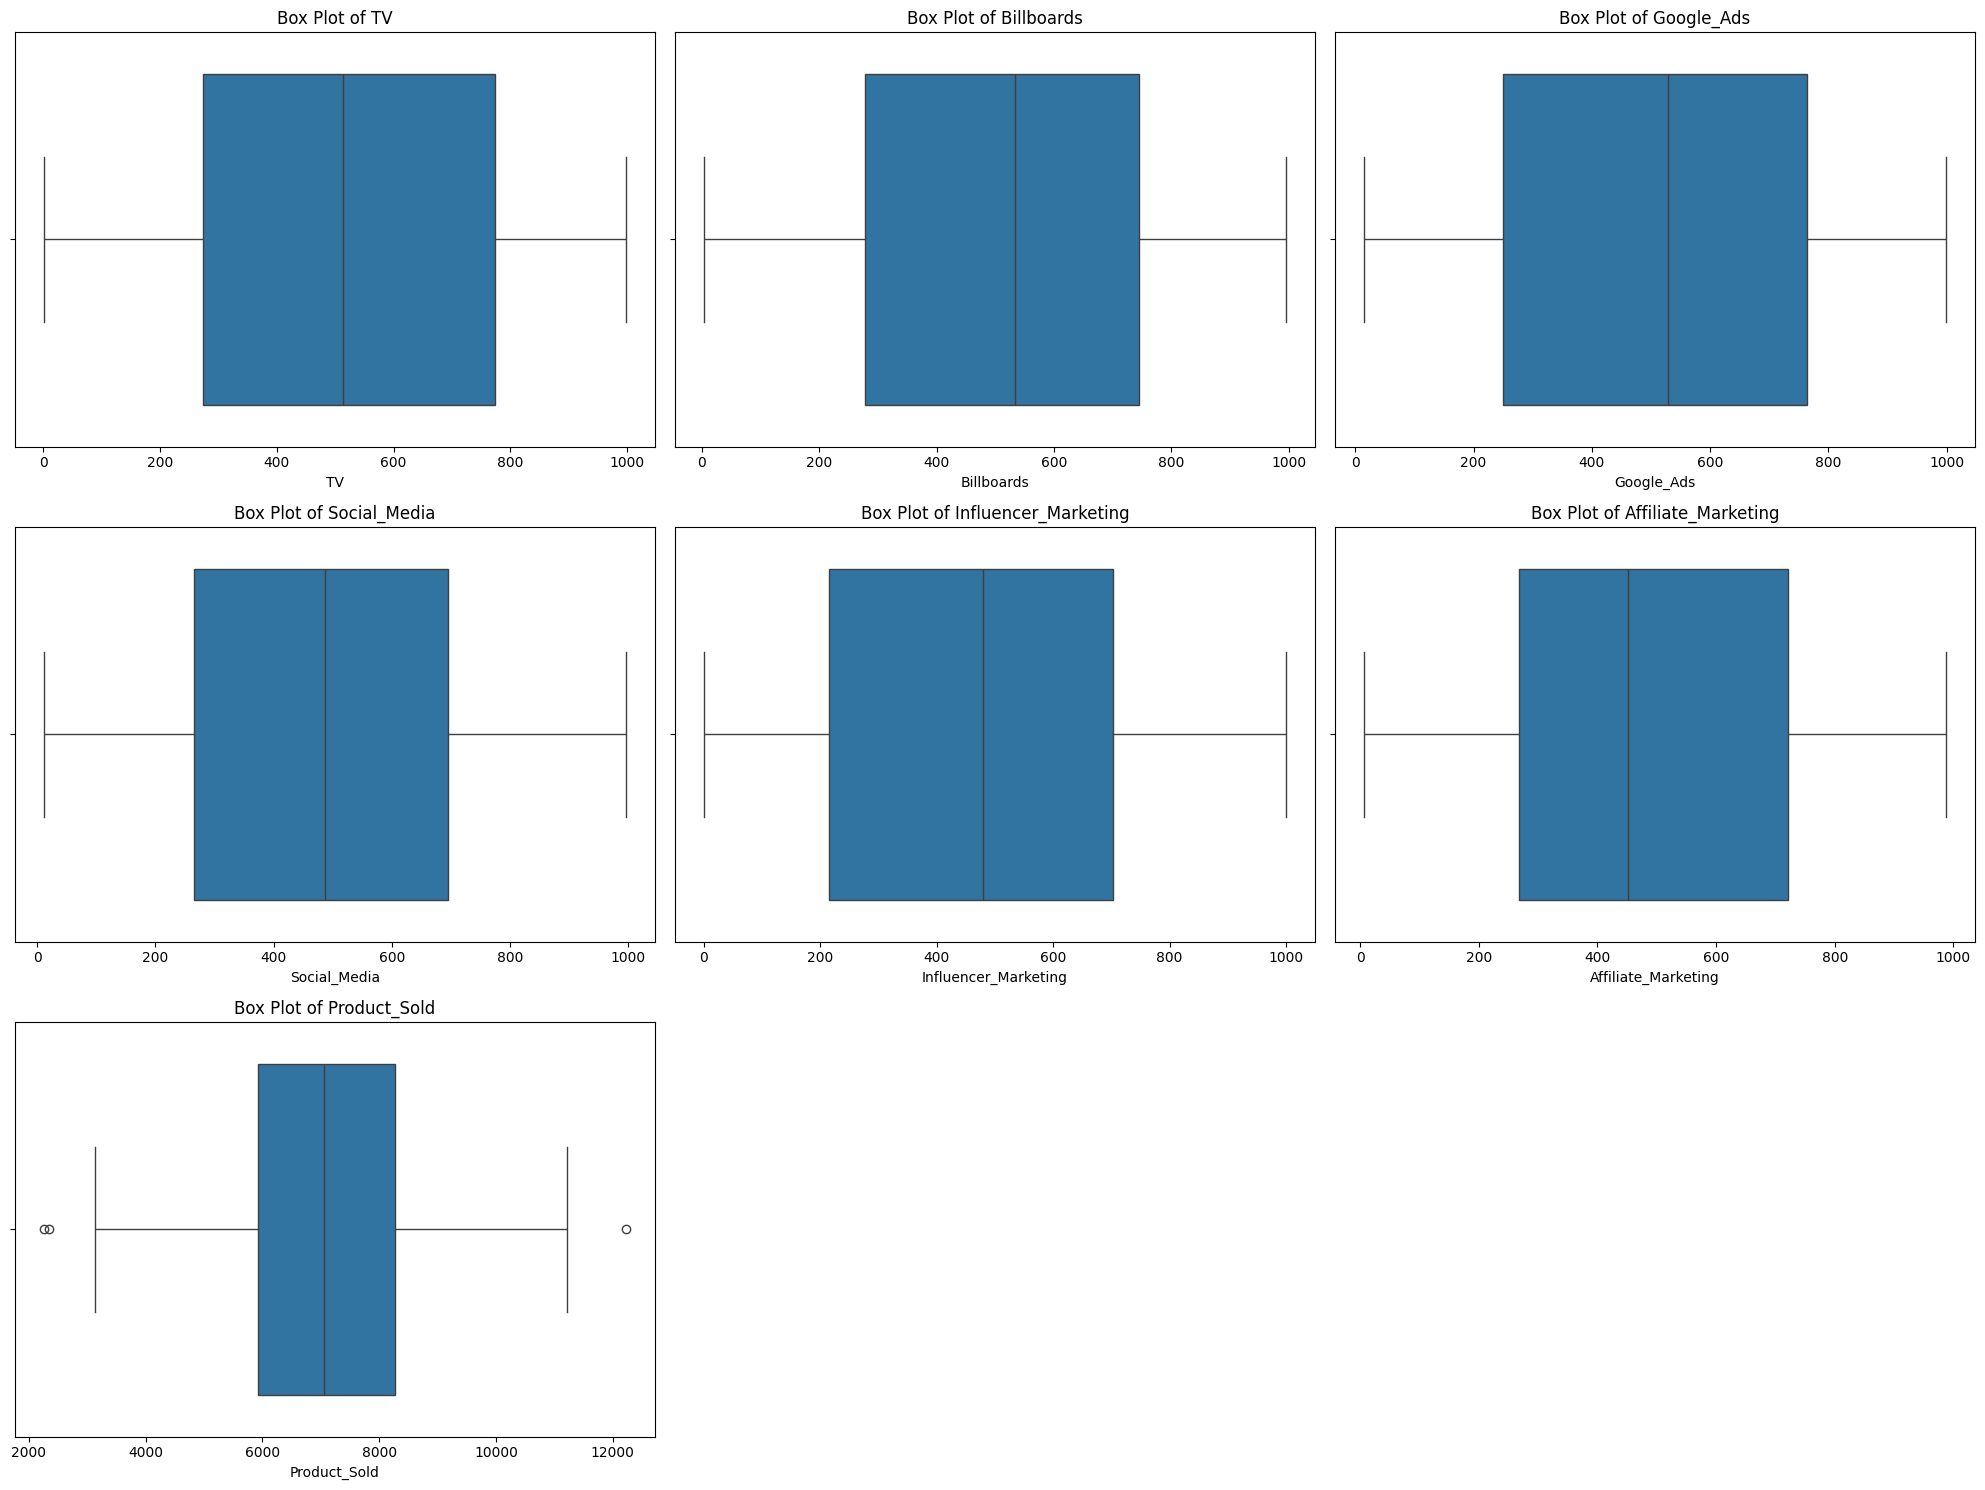

In [ ]:
# Create a grid for the plots
n_rows = 3
n_cols = 3
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 15))
axes = axes.flatten()  # Flatten the axes array for easy indexing

# Loop through each column and plot on the corresponding subplot
for idx, column in enumerate(df.columns):
    sns.boxplot(x=df[column], ax=axes[idx])
    axes[idx].set_title(f'Box Plot of {column}')

# Remove any empty subplots if df.columns has fewer than n_rows * n_cols
for j in range(len(df.columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()  # Adjust spacing
plt.show()

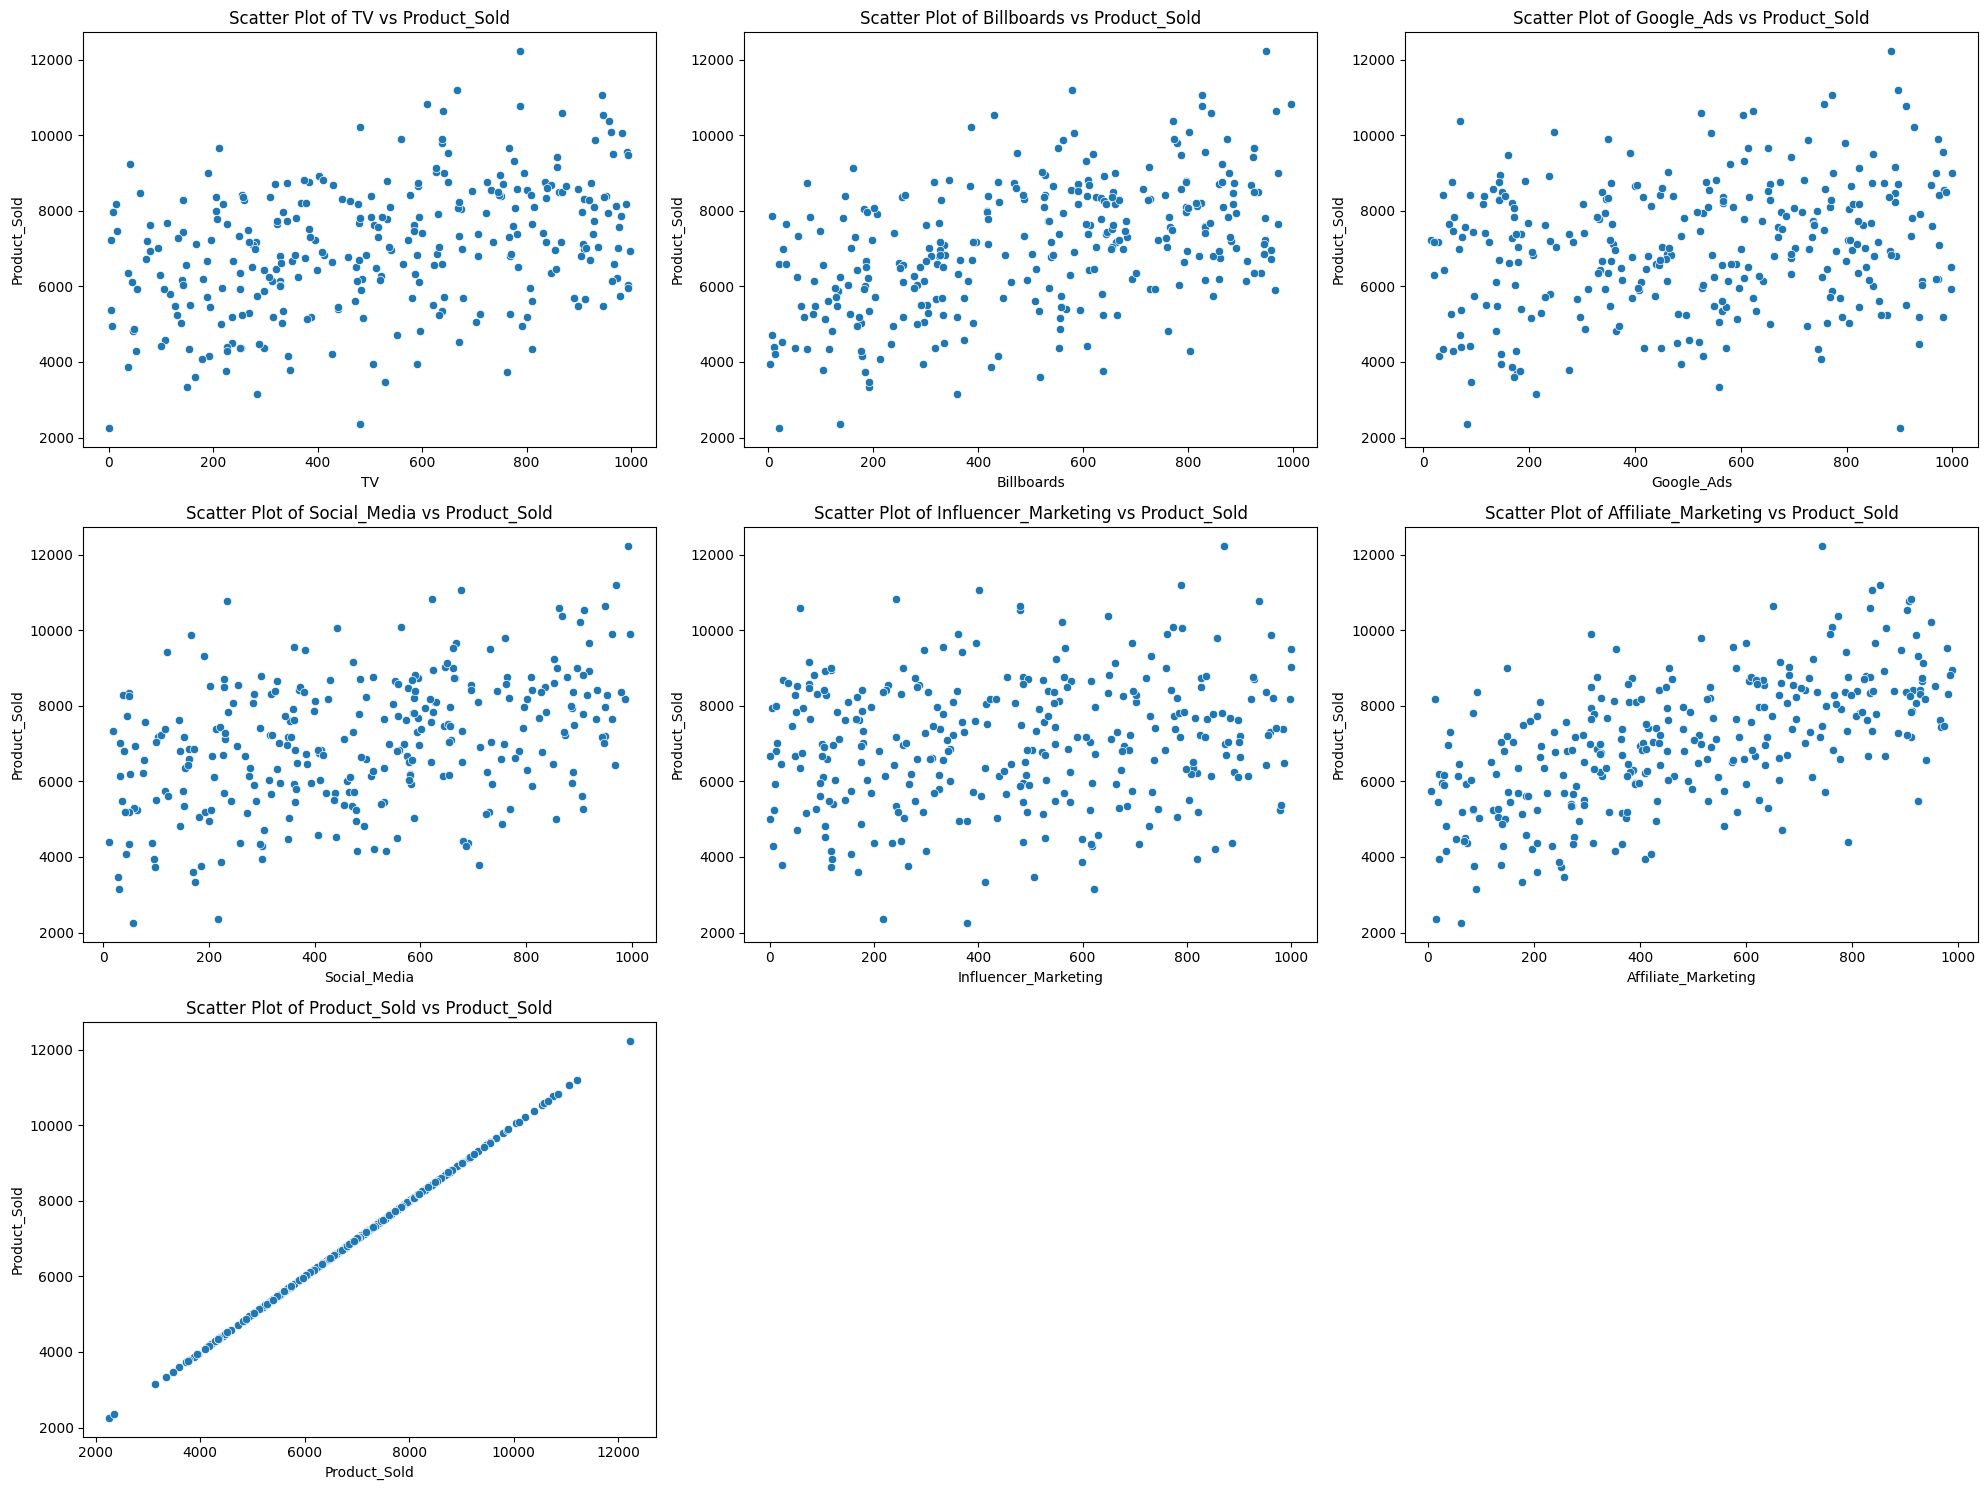

In [ ]:
n_rows = 3
n_cols = 3
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 15))
axes = axes.flatten()

for idx, column in enumerate(df.columns):
    sns.scatterplot(x=df[column], y=df['Product_Sold'], ax=axes[idx])
    axes[idx].set_title(f'Scatter Plot of {column} vs Product_Sold')

for j in range(len(df.columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [ ]:
df['Spend_Sum'] = df.drop(columns=['Product_Sold']).sum(axis=1)

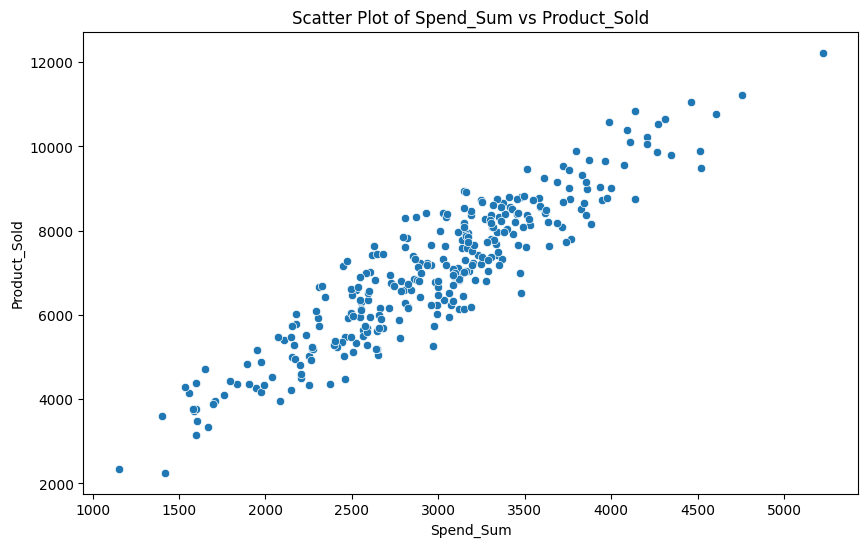

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Spend_Sum', y='Product_Sold', data=df)
plt.title('Scatter Plot of Spend_Sum vs Product_Sold')
plt.xlabel('Spend_Sum')
plt.ylabel('Product_Sold')
plt.show()

# Fit Model - Linear regression


---


- According to the model's coefficients, Affiliate Maketing has the most influence on product sold, followed by Billboard, Social Media, TV, Google Ads, and Influencer marketing, respectively.
- However, y-intercept is near zero, suggesting the product is highly dependent on marketing activities.

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X_train = df.drop('Product_Sold', axis=1)  # drop the target variable from the features
y_train = df['Product_Sold']  # target variable

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

In [ ]:
# Create a linear regression model
model = LinearRegression(fit_intercept=True)

# Fit the model to the training data
model.fit(X_train, y_train)

# Predicting on both the training and test sets
y_train_pred = model.predict(X_train)

# Calculate Mean Squared Error for both training and test data
mse_train = mean_squared_error(y_train, y_train_pred)

print(f"Mean Squared Error (Train): {mse_train}")

Mean Squared Error (Train): 111.05007797014156


In [ ]:
print("Coefficients of each feature:")
for feature, coef in zip(X_train.columns, model.coef_):
    print(f"{feature}: {coef}")

Coefficients of each feature:
TV: 2.0027362332908893
Billboards: 2.997860860143901
Google_Ads: 1.4986066622676588
Social_Media: 2.5004955481243374
Influencer_Marketing: 1.199136396881485
Affiliate_Marketing: 3.9969660012836803


In [ ]:
# Retrieve the y-intercept
y_intercept = model.intercept_
print(f"Y-Intercept: {y_intercept}")

Y-Intercept: 0.7161970526376535


# Goodness of fit


---


To understand how well the model predicts product sold, we can perform different goodness of fit and cross-validation
- R squared
- Test MSE
- Adjusted R squared
- k-fold cross validation

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
# r2
r2_train = r2_score(y_train, y_train_pred)

print(f"R-squared (Train): {r2_train}")

R-squared (Train): 0.999961998984077


In [ ]:
# Test MSE
y_test_pred = model.predict(X_test)

mse_test = mean_squared_error(y_test, y_test_pred)
print(f"Mean Squared Error (Test): {mse_test}")

Mean Squared Error (Test): 88.69568021383498


In [ ]:
# Adjusted r2
adj_r2 = 1 - (1-model.score(X_train, y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
print(f"Adjusted R-squared: {adj_r2}")

Adjusted R-squared: 0.9999609530845562


In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import numpy as np

def cross_val_mse(model, X, y, f=5):
    # Initialize the KFold object with the specified number of folds
    kf = KFold(n_splits=f, shuffle=True, random_state=42)
    mse_scores = []

    # Loop through each fold
    for train_index, test_index in kf.split(X):
        # Split the data into training and validation sets
        X_train, X_val = X.iloc[train_index], X.iloc[test_index]
        y_train, y_val = y.iloc[train_index], y.iloc[test_index]

        # Train the model on the training data
        model.fit(X_train, y_train)

        # Make predictions and calculate MSE for the validation set
        y_pred = model.predict(X_val)
        mse = mean_squared_error(y_val, y_pred)
        mse_scores.append(mse)

    # Calculate the average MSE across all folds
    avg_mse = np.mean(mse_scores)
    return avg_mse

In [ ]:
avg_mse = cross_val_mse(model, X_train, y_train)
print("Average MSE from 5-fold cross-validation for Schooling only:", avg_mse)

Average MSE from 5-fold cross-validation for Schooling only: 116.53403132801706


# Fit Model - Random forest


---


- Through SHAP summary plot, Affiliate Maketing has the most influence on product sold, followed by Billboard, Social Media, TV, Google Ads, and Influencer marketing, respectively.
- All marketing channel has positive effect on product sold.
- The result align well with linear regression.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

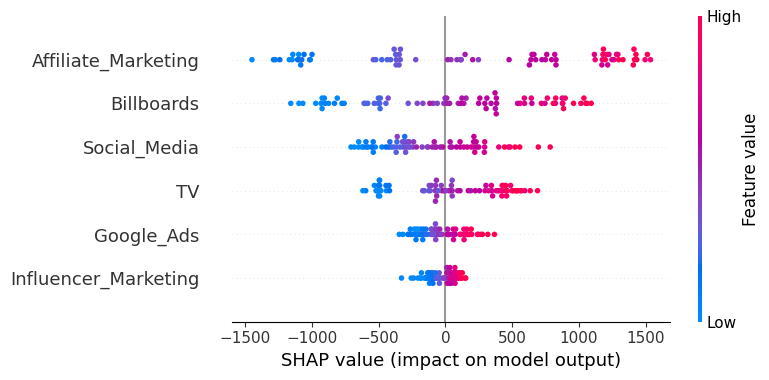

In [ ]:
import shap

# Create a SHAP explainer
explainer = shap.Explainer(model_rf)

# Calculate SHAP values for the testing set
shap_values = explainer.shap_values(X_test)

# Summary plot to visualize feature importance
shap.summary_plot(shap_values, X_test, feature_names=df.columns)

# Appendix


---
Applying adstock and Diminishing return.
  - **Adstock** determines how much of the previous period's advertising impact persists.
    - Formula is Adstock_t = Adstock_(t-1) * [ decay_rate + Ad Spend_t ]

  - **Diminishing return** indicate that the impact of additional advertising decreases as the level of spending increases.
    - Formula is Adstock_diminished = Adstock / [ (1 + Adstock) / max_capacity ]

For this dataset, applying adstock and diminishing return effect results in a much worse fit.

More context needed to assign appropriate decaying and max_capacity parameters to optimize variable transformation.



In [ ]:
# Function to apply adstock and diminishing returns transformations
def apply_adstock_and_diminishing_returns(df, decay_rates, max_capacities):
    transformed_df = df.copy()

    # Loop through each column and apply transformations
    for idx, column in enumerate(df.columns):
        # Get the decay rate and max capacity for the current column
        decay_rate = decay_rates[idx]
        max_capacity = max_capacities[idx]

        # Initialize adstock for the first value in the column
        adstock = [df[column][0]]

        # Apply adstock transformation for each period
        for i in range(1, len(df)):
            new_adstock = adstock[-1] * decay_rate + df[column][i]
            adstock.append(new_adstock)

        # Create the Adstock column
        transformed_df[f'{column}_Adstock'] = adstock

        # Apply diminishing returns transformation
        transformed_df[f'{column}_Adstock_Diminished'] = transformed_df[f'{column}_Adstock'] / (1 + transformed_df[f'{column}_Adstock'] / max_capacity)

    # Select only the diminished columns (those with '_Adstock_Diminished')
    diminished_columns = [col for col in transformed_df.columns if 'Adstock_Diminished' in col]
    return transformed_df[diminished_columns]

In [ ]:
# Assumed parameters

decay_rates = [0.5, 0.3, 0.7, 0.6, 0.4, 0.5]
max_capacities = [1000, 800, 1200, 900, 950, 1100]

In [ ]:
# Apply the transformation
transformed_df = apply_adstock_and_diminishing_returns(X_train, decay_rates, max_capacities)

In [ ]:
transformed_df['Spend_Sum'] = transformed_df.sum(axis=1)

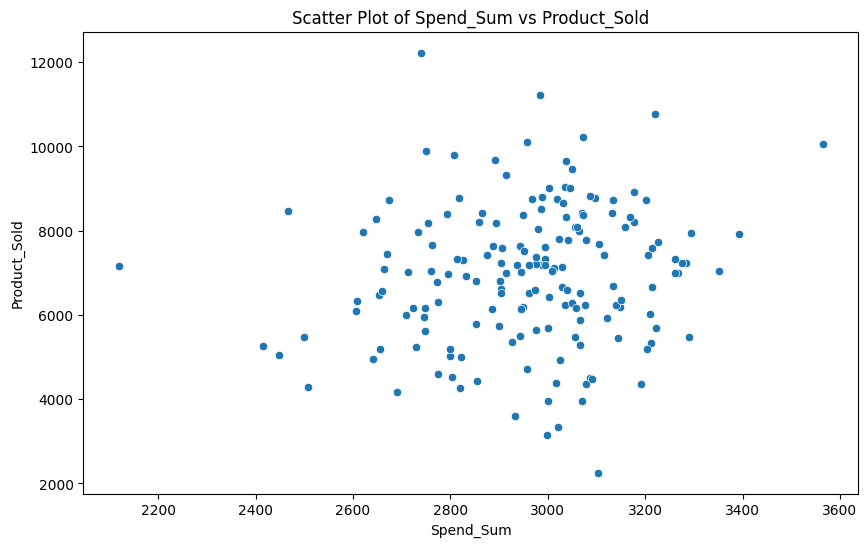

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=transformed_df['Spend_Sum'], y=y_train)
plt.title('Scatter Plot of Spend_Sum vs Product_Sold')
plt.xlabel('Spend_Sum')
plt.ylabel('Product_Sold')
plt.show()

In [ ]:
# Create a linear regression model
model_adsdm = LinearRegression(fit_intercept=True)

# Fit the model to the training data
model_adsdm.fit(X_train_transformed, y_train)

# Predicting on both the training and test sets
y_train_pred_adsdm = model_adsdm.predict(X_train_transformed)

# Calculate Mean Squared Error for both training and test data
mse_train_adsdm = mean_squared_error(y_train, y_train_pred_adsdm)

print(f"Mean Squared Error (Adstocked_Diminished Train): {mse_train_adsdm}")

Mean Squared Error (Adstocked_Diminished Train): 1044113.0520888887
